## Grade Distribution Visualization

As part of this example, I will analyze student's grade distribution in a range of undergraduate and graduate level courses to draw comparisons between courses and come up with insights regarding how to enhance residential education across different subjects.

The five distributions are as follows:

* a $t$-distribution with 9, 99, 999, and 9999 degrees of freedom with mean 0 and standard deviation 2.

* a normal distribution with mean 0 and standard deviation 2.  

First I will compare the five distributions using a **probability density plot** within a single figure so that each of the curves is in a different color and line type. 

Next I will compare the five distributions using a **violin plot** within a single figure so that each of the curves is in a different color. 

Next I will compare the five distributions using a **box and wiskers** within a single figure so that each of the distributions is in a different color. 

### Probability Density Plot

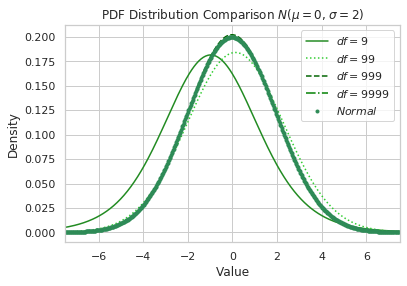

In [228]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def make_t_distribution(sample_size, mean, sd):
    t_sample = stats.t.rvs(sample_size - 1, mean, sd, sample_size) # Random t-distribution sample
    sample_mean = np.mean(t_sample) # sample mean
    sample_std = np.std(t_sample) # sample standard deviation
    t_dist = stats.t(df = sample_size - 1, loc = sample_mean, scale = sample_std) # make a t-distribution based on the sample
    x_axis = np.linspace(t_dist.ppf(0.0001), t_dist.ppf(0.9999), 500) # Generate an x-axis based on t-quantile values
    
    return t_dist, x_axis

def make_prob_plot():
    
    ax = plt.axes()
    tdist1, x1=make_t_distribution(10,0,2)
    tdist2, x2=make_t_distribution(100,0,2)
    tdist3, x3=make_t_distribution(1000,0,2)
    tdist4, x4=make_t_distribution(10000,0,2)
    tdist5, x5=make_t_distribution(500,0,2)
    
    sns.set(style="whitegrid")
    
    # density plot
    plt.xlim(-7.5,7.5)
    y1=ax.plot(x1,tdist1.pdf(x1), '-', label="$df=9$", color='forestgreen')
    y2=ax.plot(x2,tdist2.pdf(x2), ':', label="$df=99$", color='limegreen')
    y3=ax.plot(x3,tdist3.pdf(x3), '--' ,label="$df=999$", color='darkgreen')
    y4=ax.plot(x4,tdist4.pdf(x4), '-.', label="$df=9999$", color='green')
    y5=ax.plot(x5,tdist5.pdf(x5), '.', label="$Normal$", color='seagreen')
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.title("PDF Distribution Comparison $N(\mu=0$, $\sigma=2$)")
    plt.legend()

make_prob_plot()



### Box and Whsikers Plot

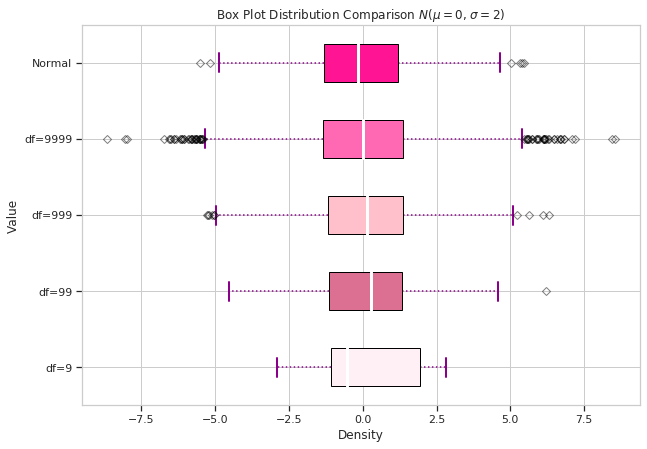

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def box_plot():    
    # boxplot

    dist1 = np.random.normal(0,2,10)
    dist2 = np.random.normal(0,2,100)
    dist3 = np.random.normal(0,2,1000)
    dist4 = np.random.normal(0,2,10000)
    dist5 = np.random.normal(0,2,500)
    
    distributions = (dist1, dist2, dist3, dist4, dist5)
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    
    bp = ax.boxplot(distributions,patch_artist = True, vert=0)
    colors = ['lavenderblush', 'palevioletred', 'pink', 'hotpink', 'deeppink'] 
    for patch, color in zip(bp['boxes'], colors): patch.set_facecolor(color) 
    
    for whisker in bp['whiskers']: whisker.set(color ='#8B008B', linewidth = 1.5, linestyle =":") 
    
    # changing color and linewidth of caps 
    for cap in bp['caps']: cap.set(color ='#8B008B', linewidth = 2) 

    # changing color and linewidth of medians 
    for median in bp['medians']: median.set(color ='white', linewidth = 3) 

    # changing style of fliers 
    for flier in bp['fliers']: flier.set(marker ='D', color ='#e7298a', alpha = 0.5) 

    # x-axis labels 
    ax.set_yticklabels(["df=9","df=99","df=999","df=9999","Normal"]) 

    sns.set(style="whitegrid")
        
    # Removing top axes and right axes ticks 
    ax.get_xaxis().tick_bottom() 
    ax.get_yaxis().tick_left() 
    
    # title of plot
    plt.title("Box Plot Distribution Comparison $N(\mu=0$, $\sigma=2$)")
    plt.xlabel("Density")
    plt.ylabel("Value")
    
    # show plot 
    plt.show(bp)
    
box_plot()   

### Violin Plot

dict_keys(['bodies', 'cmeans', 'cmaxes', 'cmins', 'cbars', 'cmedians'])


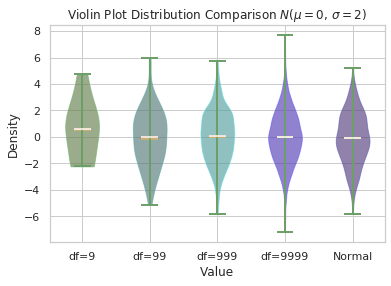

In [52]:
def violin():
    
    dist1 = np.random.normal(0,2,10)
    dist2 = np.random.normal(0,2,100)
    dist3 = np.random.normal(0,2,1000)
    dist4 = np.random.normal(0,2,10000)
    dist5 = np.random.normal(0,2,500)
    
    distributions = (dist1, dist2, dist3, dist4, dist5)
    plt.violinplot(distributions);
    plt.violinplot(distributions, showmeans=True, showmedians=True  );
    
    #show Components 
    violinplt = plt.violinplot(distributions, showmeans=True, showmedians=True  );
    #print (violinplt)
    print (violinplt.keys())
    violinplt['cmeans'].set_color('y')
    violinplt['bodies'][0].set_color('forestgreen')
    violinplt['bodies'][1].set_color('teal')
    violinplt['bodies'][2].set_color('darkturquoise')
    violinplt['bodies'][3].set_color('blue')
    violinplt['bodies'][4].set_color('darkblue')
    
    plt.title("Violin Plot Distribution Comparison $N(\mu=0$, $\sigma=2$)")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.xticks([1, 2, 3, 4, 5], ["df=9","df=99","df=999","df=9999", "Normal"]) 
    
    # note violin plot requires slightly different syntax for each of the components
    violinplt['cmedians'].set_color(('w'))
    
violin()

## Grade Distribution Comparison

The class data considers the letter grades for STATS 250, DATASCI 306, MATH 217, ENGLISH 125, ECON 101, EECS 545 for the past records since 2015. The student grades are stored in 6 columns: 
* `STATS250_grade` stores the letter grades for those who took the STATS 250 course
* `DATASCI306_grade` stores the letter grades for those who took the DATASCI 306 course
* `MATH217_grade` stores the letter grades for those who took the MATH 217 course
* `ENGLISH125_grade` stores the letter grades for those who took the ENGLISH 125 course
* `ECON101_grade` stores the letter grades for those who took the ECON 101 course
* `EECS545_grade` stores the letter grades for those who took the EECS 545 course

Prior to drawing plots for student grade distribution, it's useful to compute the total student enrollments for each course (of course, you need to ignore NAN values) and convert student's letter grades into standard grade points. Here's a nice table on the grade point systems available at the umich website:

| Letter Grade | Grade Point |
|:---: |:----:|
| A+ | 4.3 |
| A | 4.0 |
| A- | 3.7 |
| B+ | 3.3 |
| B | 3 |
| B- | 2.7 |
| C+ | 2.3 |
| C | 2 |
| C- | 1.7 |
| D+ | 1.3 |
| D | 1 |
| D- | 0.7 |
| E | 0 |

For this example, I will:
* Make a **3 * 2** figure (so 6 subplots) such that for each course you have a **histogram** using the student grade samples respectively.
* Remove the gaps between the bars in the histograms if any.
* For each probability plot, overlay a normal distribution with the same mean and standard deviation parameters. 
* Use a legend on each plot to specify the corresponding course name and number of students involved. 

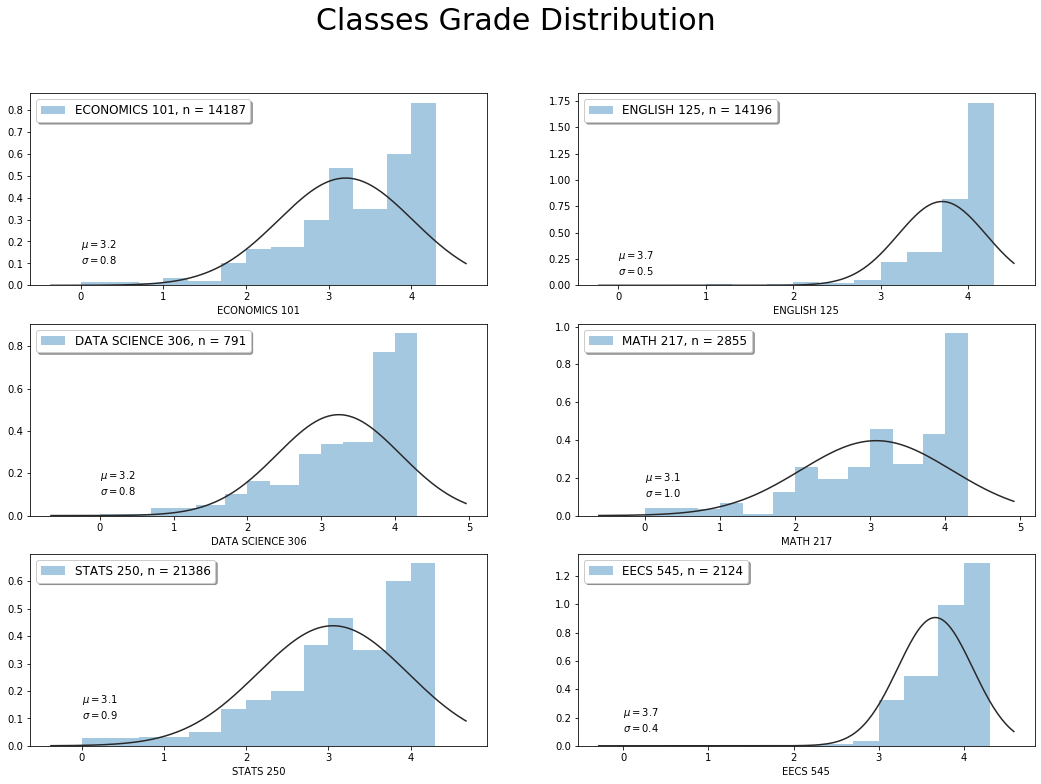

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats

def df_load():
    df = pd.read_csv("assets/class_grades.csv", comment='#')
    df = df.rename(columns={"Unnamed: 0": "Index"})
    df = df.drop(columns=["Index"])
    col=df.groupby(['STATS250_grade','DATASCI306_grade','MATH217_grade','ENGLISH125_grade','ECON101_grade','EECS545_grade'])
    
    grades = ['A+','A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'E']
    gpa = [4.3,4.0, 3.7, 3.3, 3.0, 2.7, 2.3, 2.0, 1.7, 1.3, 1.0, 0.7, 0.0]
    gpa_dict = dict(zip(grades, gpa))

    df['ECON101_grade'] = df.replace({'ECON101_grade' : gpa_dict})['ECON101_grade']
    df['EECS545_grade'] = df.replace({'EECS545_grade' : gpa_dict})['EECS545_grade']
    df['ENGLISH125_grade'] = df.replace({'ENGLISH125_grade' : gpa_dict})['ENGLISH125_grade']
    df['MATH217_grade'] = df.replace({'MATH217_grade' : gpa_dict})['MATH217_grade']
    df['DATASCI306_grade'] = df.replace({'DATASCI306_grade' : gpa_dict})['DATASCI306_grade']
    df['STATS250_grade'] = df.replace({'STATS250_grade' : gpa_dict})['STATS250_grade']
    
    return df

def grade_distribution(df_load):
    fig, ax=plt.subplots(3,2,figsize=(18,12))
    fig.suptitle("Classes Grade Distribution", fontsize=30)
    data = df_load.rename(columns={"STATS250_grade": "STATS 250","ECON101_grade": "ECONOMICS 101","ENGLISH125_grade": "ENGLISH 125","DATASCI306_grade": "DATA SCIENCE 306","MATH217_grade": "MATH 217","EECS545_grade": "EECS 545"})
    
    class_names = ['ECONOMICS 101','ENGLISH 125','DATA SCIENCE 306','MATH 217','STATS 250', 'EECS 545']
    for col, x in zip(class_names,ax.ravel()):
       df = data[col].dropna()
       bin = list([4.3,4.0, 3.7, 3.3, 3.0, 2.7, 2.3, 2.0, 1.7, 1.3, 1.0, 0.7, 0.0][::-1])
       labels = '{}, n = {}'.format(col, df.shape[0])
       sns.distplot(df, hist=True, kde=False, ax=x, bins = bin, fit=stats.norm, label = labels)
       n = data[col].count()
       x.text(x=np.min(df), y=0.1, s=r"$\mu=%0.1f$" % stats.norm.fit(df)[0] + "\n" + r"$\sigma=%0.1f$" % stats.norm.fit(df)[1], color='black')
       legend=x.legend(loc='best', shadow=True, fontsize='large')

grade_distribution(df_load())


# Question 3 Grade Distribution Normality Check

Seeing the student grade distributions of the 6 large residential courses, the team team is tempted to draft recommendations for instructors and report to them what particular aspects could be addressed to improve students' academic learning outcome. However, before they launch statistical tests, they need to verify if the student grades data approximately follows normal distribution, a sufficient condition rendering the design of statistical models valid for those courses. You suggest that a QQ-plot is a great method to determine how similar a distribution is to another. Great idea!
* Make a 3 * 2 figure (again, 6 subplots) so that for each course you have a QQ plot using the student grade samples versus the normal distribution with the same mean and standard deviation
* You need to use a legend on each plot to specify the corresponding course name and number of students involved. For example, you can draw a legend and specify "STATS 250, n=5000" to indicate that you are analyzing STATS 250 course with 5000 enrolled students records being used for analysis
* For each QQ-plot, use annotate tool inside the graph to circle observations which are 2 standard deviations outside from the QQ-line (a straight line showing the theoretical values for different quantiles under normal distribution)
* Write a couple of sentence about the figure discussing the courses and whether they seem to be normally distributed.

Hint: You may find using `fig = plt.figure()` and `fig.add_subplot()` functions helpful to create subplots. You don't have to use these functions though.

[-3.89620068 -3.67571642 -3.55487879 -3.47068951 -3.40563884]
[-3.89635435 -3.6758783  -3.55504553 -3.47085981 -3.40581199]
[-3.1293698  -2.85882398 -2.70748931 -2.60057732 -2.51705656]
[-3.48862692 -3.24403726 -3.10873224 -3.0138733  -2.94022019]
[-3.99453456 -3.77918382 -3.66137958 -3.57940432 -3.51612436]
[-3.40876593 -3.1588366  -3.02027406 -2.92298624 -2.84735796]


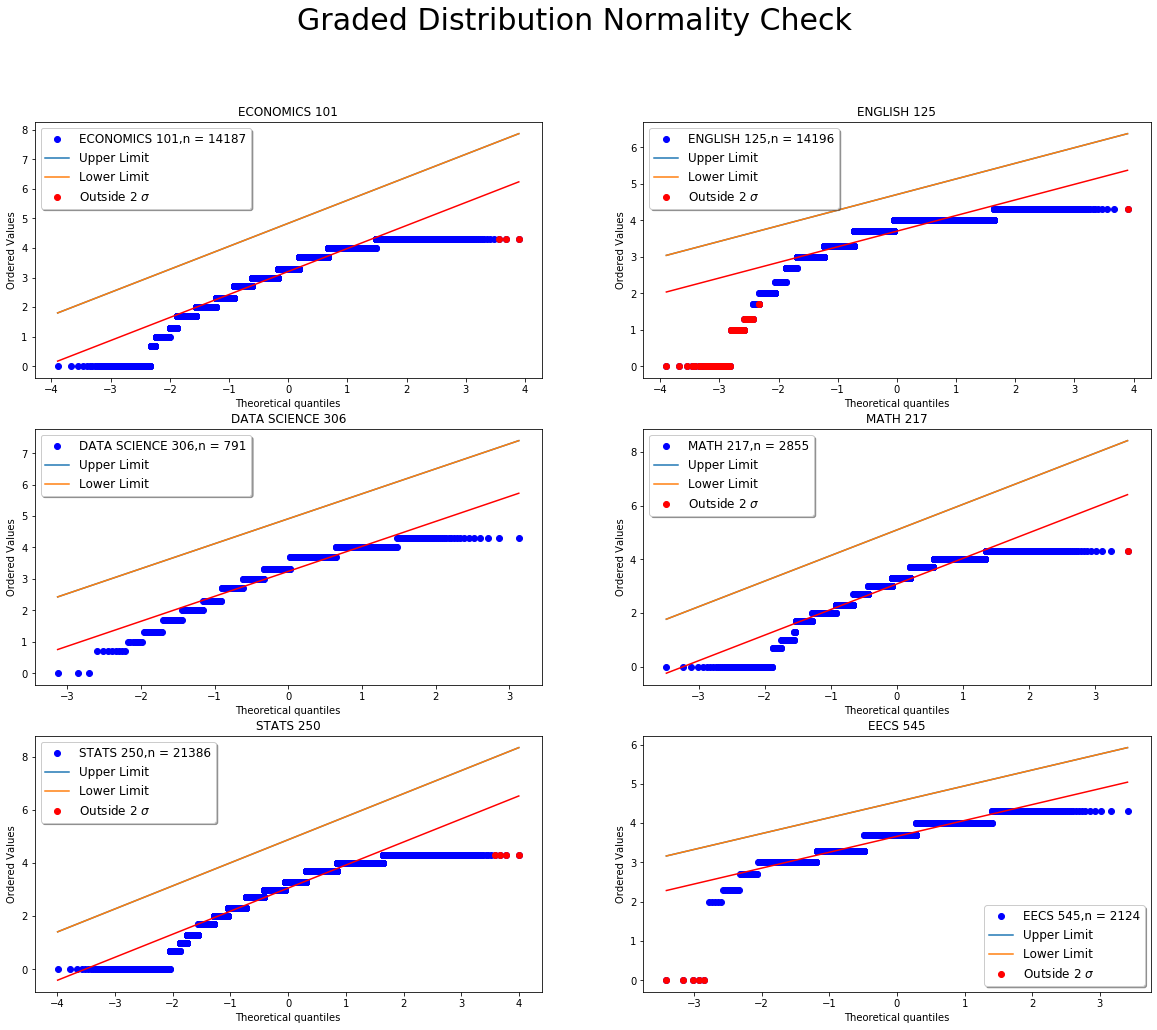

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats

def grade_normality(df_load):
    
    fig, ax = plt.subplots(3,2,figsize=(20,16))
    fig.suptitle("Graded Distribution Normality Check", fontsize=30)
    data = df_load.rename(columns={"STATS250_grade": "STATS 250","ECON101_grade": "ECONOMICS 101","ENGLISH125_grade": "ENGLISH 125","DATASCI306_grade": "DATA SCIENCE 306","MATH217_grade": "MATH 217","EECS545_grade": "EECS 545"})
    labels = ['ECONOMICS 101','ENGLISH 125','DATA SCIENCE 306','MATH 217','STATS 250', 'EECS 545']
    for col, xlab in zip(labels,ax.ravel()):
    
        df = data[col].dropna()
        p=stats.probplot(df, dist="norm",fit=True,plot = xlab)
        (s,rr)=p[0]
        (slope,intercept,r) = p[1]
        print(s[:5])
                           
        upper_limit=((slope*s)+intercept)+(2*df.std())
        lower_limit=((slope*s)+intercept)-(2*df.std())
        xlab.plot(s,upper_limit,label="Upper Limit")
        xlab.plot(s,upper_limit,label="Lower Limit")                   
        
        xlab.set_title(col)
        x_axis=[]
        y_axis=[]
        for x, y in zip(s,rr):
            if (y>slope*x+intercept+2*df.std()) or (y<slope*x+intercept-2*df.std()):
                 x_axis.append(x)
                 y_axis.append(y)
        if len(x_axis) > 0:
            xlab.plot(x_axis,y_axis,"ro", label="Outside 2 $\sigma$")
        labels='{},n = {}'.format(col,df.shape[0])
        lines=xlab.get_lines()
        lines[0].set_label(labels)
        legend=xlab.legend(loc='best',shadow=True, fontsize='large',)

grade_normality(df_load())

Most of the grade distribution does not follow QQ points. A normal distribution would have placed the points closer to the straight line. The EECS545 and ENGLISH125 class data are the only datasets that have most points outside of the 2 std in comparison to the rest of the datasets. 